<a href="https://colab.research.google.com/github/mdelleani/neuro-next-bootcamp/blob/main/notebooks/02_advanced_ai_neurology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applicazioni Avanzate dell'IA in Neurologia: Dalla Segmentazione Immagini ai LLM 🧠

**Sessione Interattiva | Parte II: Applicazioni Pratiche**

* **Docente:** M. Delleani
* **Orario:** 18:00 - 19:15

---

Benvenuti alla seconda parte della nostra sessione interattiva!

Mentre il titolo originale della sessione era focalizzato sulla generazione di dati sintetici, per questa demo pratica abbiamo scelto di esplorare due aree di frontiera dell'Intelligenza Artificiale con un impatto immediato e tangibile in Neurologia, più facilmente dimostrabili in un contesto di sessione interattiva:


1.  **Large Language Models (LLM) per l'Analisi Testuale:** Come i modelli di linguaggio possono elaborare e interpretare testo medico (es. cartelle cliniche, articoli scientifici) per estrarre informazioni chiave, riassumere o rispondere a domande.
2.  **Segmentazione di Immagini Mediche:** Come l'IA può aiutare a identificare e delineare automaticamente strutture o patologie (es. lesioni, tumori, regioni cerebrali) nelle immagini diagnostiche (RM, TC).

Queste applicazioni mostrano la versatilità e il potenziale dell'IA nel supportare la diagnosi, la ricerca e la gestione clinica in neurologia.

---

### 1. Large Language Models (LLM) per l'Analisi Testuale in Neurologia
I Large Language Models (LLM) sono modelli di IA addestrati su enormi quantità di testo per comprendere, generare e manipolare il linguaggio umano. Hanno rivoluzionato il modo in cui interagiamo con l'informazione e stanno mostrando un potenziale immenso anche nel settore medico.



#### 1.1. Applicazioni degli LLM in Medicina e Neurologia

- Riassunto di Cartelle Cliniche/Articoli: Estrarre i punti chiave da lunghi testi.

- Estrazione di Informazioni: Identificare sintomi, diagnosi, farmaci, dosaggi da testi non strutturati.

- Supporto Decisionale Clinico: Fornire informazioni basate sull'evidenza da banche dati mediche (con cautela).

- Generazione di Rapporti: Aiutare a redigere referti o documentazione.
Analisi di Testi Scientifici: Accelerare la revisione della letteratura.



#### 1.2. Interagire con LLM Generali e Specializzati

Avremo la possibilità di interagire con un server di inferenza ad alte prestazioni per LLMche ci permetterà di testare rapidamente modelli di linguaggio.

Useremo un approccio basato su API (Application Programming Interface), simulando una chiamata a un servizio esterno che ospita il modello.

**Esempio testo in Neurologia**

In [ ]:
testo_clinico_neurologia = """
Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.
"""

testo_articolo_neurologia = """
Uno studio recente ha esplorato l'efficacia di un nuovo anticorpo monoclonale, Aducanumab,
nel ridurre le placche amiloidi nel cervello di pazienti affetti da Alzheimer in fase precoce.
I risultati preliminari indicano una riduzione significativa del carico di amiloide,
tuttavia, la correlazione con il miglioramento clinico rimane oggetto di dibattito,
con alcuni pazienti che riportano eventi avversi come ARIA-E. La ricerca è stata pubblicata
su "Nature Neuroscience".
"""

print("Testo Clinico di Esempio:")
print(testo_clinico_neurologia)
print("\nTesto Articolo Scientifico di Esempio:")
print(testo_articolo_neurologia)

Testo Clinico di Esempio:

Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.


Testo Articolo Scientifico di Esempio:

Uno studio recente ha esplorato l'efficacia di un nuovo anticorpo monoclonale, Aducanumab,
nel ridurre le placche amiloidi nel cervello di pazienti affetti da Alzheimer in fase precoce.
I risultati preliminari indicano una riduzione significativa del carico di amiloide,
tuttavia, la correlazione con il miglioramento clinico rimane oggetto di dibattito,

**Funzione per Chiamare un LLM (via API)**

Simuleremo una chiamata API al tuo server vLLM. Dovrai sostituire YOUR_VLLM_ENDPOINT e YOUR_MODEL_NAME con i dettagli reali del tuo setup vLLM.

In [5]:
from utils import ask_generalist_llm, ask_specialized_llm
import asyncio

messages = [
    {"role": "system", "content": [{"type": "text", "text": "Sei un assistente medico..."}]},
    {"role": "user", "content": [{"type": "text", "text": "Referto: Paziente..."}]}
]

# Run one or the other
response = await ask_generalist_llm(messages)
# OR
# response = await ask_specialized_llm(messages)

print(response)


ModuleNotFoundError: No module named 'utils'

In [ ]:

# 2. Prompt few-shot + nuovo referto
few_shot_examples = """
Referto:
Paziente maschio di 52 anni con cefalea intensa, nausea e rigidità nucale. RM encefalo mostra emorragia subaracnoidea. Inizia trattamento in neurochirurgia. Diagnosi: emorragia subaracnoidea.

Risposta:
Diagnosi: Emorragia subaracnoidea
Sintomi principali: Cefalea intensa, nausea, rigidità nucale
Trattamento consigliato: Osservazione e valutazione neurochirurgica
Imaging anomalo: sì, emorragia subaracnoidea alla RM

---

Referto:
Donna di 74 anni con progressiva perdita di memoria, disorientamento temporale e alterazioni comportamentali. TC encefalo: atrofia diffusa. Diagnosi probabile: demenza di Alzheimer. Inizia trattamento con donepezil.

Risposta:
Diagnosi: Demenza di Alzheimer (probabile)
Sintomi principali: Perdita di memoria, disorientamento, alterazioni comportamentali
Trattamento consigliato: Donepezil
Imaging anomalo: sì, atrofia diffusa alla TC

---

Referto:
Paziente di 67 anni giunge in PS per insorgenza improvvisa di emiparesi destra e disartria. TC encefalo negativa. RM encefalo mostra lesione ischemica recente in territorio lenticolo-capsulare sinistro. Inizia trattamento con ASA e statine. Diagnosi: ictus ischemico in paziente ipertesa.

Risposta:
"""

prompt = few_shot_examples.strip()

In [3]:
prompt

'Referto:\nPaziente maschio di 52 anni con cefalea intensa, nausea e rigidità nucale. RM encefalo mostra emorragia subaracnoidea. Inizia trattamento in neurochirurgia. Diagnosi: emorragia subaracnoidea.\n\nRisposta:\nDiagnosi: Emorragia subaracnoidea  \nSintomi principali: Cefalea intensa, nausea, rigidità nucale  \nTrattamento consigliato: Osservazione e valutazione neurochirurgica  \nImaging anomalo: sì, emorragia subaracnoidea alla RM\n\n---\n\nReferto:\nDonna di 74 anni con progressiva perdita di memoria, disorientamento temporale e alterazioni comportamentali. TC encefalo: atrofia diffusa. Diagnosi probabile: demenza di Alzheimer. Inizia trattamento con donepezil.\n\nRisposta:\nDiagnosi: Demenza di Alzheimer (probabile)  \nSintomi principali: Perdita di memoria, disorientamento, alterazioni comportamentali  \nTrattamento consigliato: Donepezil  \nImaging anomalo: sì, atrofia diffusa alla TC\n\n---\n\nReferto:\nPaziente di 67 anni giunge in PS per insorgenza improvvisa di emiparesi

In [ ]:
if VLLM_ENDPOINT is None:
    print("\nSkipping LLM demo: Please configure VLLM_ENDPOINT in the cell above.")
else:
    print("\n--- Riassunto di Testo (Modello Generalista) ---")
    prompt_riassunto_clinico = f"Riassumi il seguente testo clinico in 2-3 frasi:\n\n{testo_clinico_neurologia}\n\nRiassunto:"
    riassunto_generalista =  await call_llm(prompt_riassunto_clinico, GENERALIST_MODEL_NAME)
    print(f"\nPrompt: {prompt_riassunto_clinico[:]}") # Stampa solo l'inizio del prompt
    print(f"Risposta (Generalista):")
    for i in range(0, len(riassunto_generalista), 100):
      print(riassunto_generalista[i:i+100])


--- Riassunto di Testo (Modello Generalista) ---

Prompt: Riassumi il seguente testo clinico in 2-3 frasi:


Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.


Riassunto:
Risposta (Generalista):
Si è verificato un errore inatteso: Client error '404 Not Found' for url 'http://35.240.108.178:8000
/v1/chat/completions'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/
Status/404


In [ ]:
from pydantic import BaseModel
from enum import Enum


import requests
import json
import httpx


HOST = "35.240.108.178"
PORT = 8000

# --- CONFIGURAZIONE DEL TUO VLLM (DA MODIFICARE!) ---
VLLM_ENDPOINT = f"http://{HOST}:{PORT}/v1/chat/completions" # Esempio: http://tuo_server_ip:8000/generate
GENERALIST_MODEL_NAME = "microsoft/Phi-3-mini-4k-instruct" # Esempio: "mistralai/Mistral-7B-Instruct-v0.2"
MEDGEMMA_MODEL_NAME = "unsloth/medgemma-4b-it-bnb-4bit" # Esempio: "google/medgemma-7b"



class Diagnosi(str, Enum):
    alzheimer = "alzheimer"
    mielodisplasia = "mielodisplasia"
    leucemia = "leucemia"

class PatientDescription(BaseModel):
    name: str
    age: str
    diagnosi: Diagnosi
    sintomi: str

json_schema = PatientDescription.model_json_schema()


payload = {
        "messages": [   {"role": "system", "content": "Sei un utile assistente medico. Devi estrarre informazioni dal testo fornito."},
                        {
                            "role": "user",
                            "content": """Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.""",
                        }
                    ],
        "model": GENERALIST_MODEL_NAME,
        "response_format": {
                            "type": "json_schema",
                            "json_schema": {
                                "name": "car-description",
                                "schema": PatientDescription.model_json_schema()
                            },
                        },
    }


In [ ]:
try:
  async with httpx.AsyncClient(timeout=50) as client:
    response = await client.post(VLLM_ENDPOINT, json=payload)
    response.raise_for_status()
    result = response.json()
    response_text = result["choices"][0]["message"]["content"]
    # vLLM restituisce un array di "text" nei "outputs"
except Exception as e:
  print(e)

In [ ]:
result

{'id': 'chatcmpl-3a2a196e7414466ba963928236069965',
 'object': 'chat.completion',
 'created': 1751027594,
 'model': 'microsoft/Phi-3-mini-4k-instruct',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'reasoning_content': None,
    'content': '{\n\t"name": "M.D.",\n\t"age": "72",\n\t"diagnosi": "leucemia",\n\t"sintomi": "disprassia costruttiva, deficit di memoria episodica, disorientamento temporale e spaziale."\n}',
    'tool_calls': []},
   'logprobs': None,
   'finish_reason': 'stop',
   'stop_reason': None}],
 'usage': {'prompt_tokens': 222,
  'total_tokens': 294,
  'completion_tokens': 72,
  'prompt_tokens_details': None},
 'prompt_logprobs': None,
 'kv_transfer_params': None}

In [ ]:
prompt_riassunto_articolo = f"Riassumi il seguente abstract scientifico in 3-4 frasi:\n\n{testo_articolo_neurologia}\n\nRiassunto:"
riassunto_generalista_articolo = await call_llm(prompt_riassunto_articolo, GENERALIST_MODEL_NAME)
print(f"\nPrompt: {prompt_riassunto_articolo}...")
print(f"Risposta (Generalista):\n{riassunto_generalista_articolo}")


Prompt: Riassumi il seguente abstract scientifico in 3-4 frasi:


Uno studio recente ha esplorato l'efficacia di un nuovo anticorpo monoclonale, Aducanumab,
nel ridurre le placche amiloidi nel cervello di pazienti affetti da Alzheimer in fase precoce.
I risultati preliminari indicano una riduzione significativa del carico di amiloide,
tuttavia, la correlazione con il miglioramento clinico rimane oggetto di dibattito,
con alcuni pazienti che riportano eventi avversi come ARIA-E. La ricerca è stata pubblicata
su "Nature Neuroscience".


Riassunto:...
Risposta (Generalista):
Si è verificato un errore inatteso: Client error '404 Not Found' for url 'http://35.240.108.178:8000/v1/chat/completions'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/404


In [ ]:

print("\n--- Estrazione di Informazioni (Modello Generalista) ---")
prompt_estrazione = f"""Dal seguente testo clinico, estrai le seguenti informazioni in formato JSON:
- Età del paziente
- Diagnosi principale
- Farmaci prescritti
- Biomarker CSF menzionati

Testo:
{testo_clinico_neurologia}

JSON:"""
estrazione_generalista = await call_llm(prompt_estrazione, GENERALIST_MODEL_NAME, max_tokens=200, temperature=0.1) # Temperatura più bassa per precisione
print(f"\nPrompt: {prompt_estrazione}...")
print(f"Risposta (Generalista):\n{estrazione_generalista}")

# Prova a parsare il JSON se il modello risponde correttamente
try:
    json_output = json.loads(estrazione_generalista)
    print("\nInformazioni estratte (Parsate JSON):")
    print(json.dumps(json_output, indent=2))
except json.JSONDecodeError:
    print("\nImpossibile parsare la risposta come JSON. Il modello potrebbe non aver formattato correttamente.")


--- Estrazione di Informazioni (Modello Generalista) ---

Prompt: Dal seguente testo clinico, estrai le seguenti informazioni in formato JSON:
- Età del paziente
- Diagnosi principale
- Farmaci prescritti
- Biomarker CSF menzionati

Testo:

Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.


JSON:...
Risposta (Generalista):
Si è verificato un errore inatteso: Client error '404 Not Found' for url 'http://35.240.108.178:8000/v1/chat/completions'
For more information che

In [ ]:

  print("\n--- Riassunto di Testo (MedGemma - Modello Specializzato) ---")
  # Riutilizziamo lo stesso prompt per un confronto diretto
  riassunto_medgemma = await call_llm(prompt_riassunto_clinico, MEDGEMMA_MODEL_NAME)
  print(f"\nPrompt: {prompt_riassunto_clinico}...")
  print(f"Risposta (MedGemma):\n{riassunto_medgemma}")

  print("\n--- Estrazione di Informazioni (MedGemma - Modello Specializzato) ---")
  estrazione_medgemma = await call_llm(prompt_estrazione, MEDGEMMA_MODEL_NAME, max_tokens=200, temperature=0.1)
  print(f"\nPrompt: {prompt_estrazione}")
  print(f"Risposta (MedGemma):\n{estrazione_medgemma}")
  try:
      json_output_medgemma = json.loads(estrazione_medgemma)
      print("\nInformazioni estratte (MedGemma Parsate JSON):")
      print(json.dumps(json_output_medgemma, indent=2))
  except json.JSONDecodeError:
      print("\nImpossibile parsare la risposta come JSON. Il modello potrebbe non aver formattato correttamente.")




--- Riassunto di Testo (MedGemma - Modello Specializzato) ---

Prompt: Riassumi il seguente testo clinico in 2-3 frasi:


Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.


Riassunto:...
Risposta (MedGemma):
Il paziente M.D., 72 anni, è ricoverato per peggioramento delle sue difficoltà cognitive, principalmente legate a deficit di memoria, disorientamento e disprassia costruttiva. La RM cerebrale conferma atrofia ippocampale e una componente vascolare, supportando la

In [ ]:
  print("\nDiscussione dei risultati:")
  print("Notate le differenze tra le risposte del modello generalista e di MedGemma.")
  print("MedGemma dovrebbe dimostrare una maggiore comprensione del contesto medico e una migliore aderenza alle richieste specifiche del dominio.")


Discussione dei risultati:
Notate le differenze tra le risposte del modello generalista e di MedGemma.
MedGemma dovrebbe dimostrare una maggiore comprensione del contesto medico e una migliore aderenza alle richieste specifiche del dominio.


In [ ]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

prompt = "Descrivi questa MRI"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://alzheimersnewstoday.com/wp-content/uploads/2014/10/WhiteMatterHyperintensities.jpg" # "https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

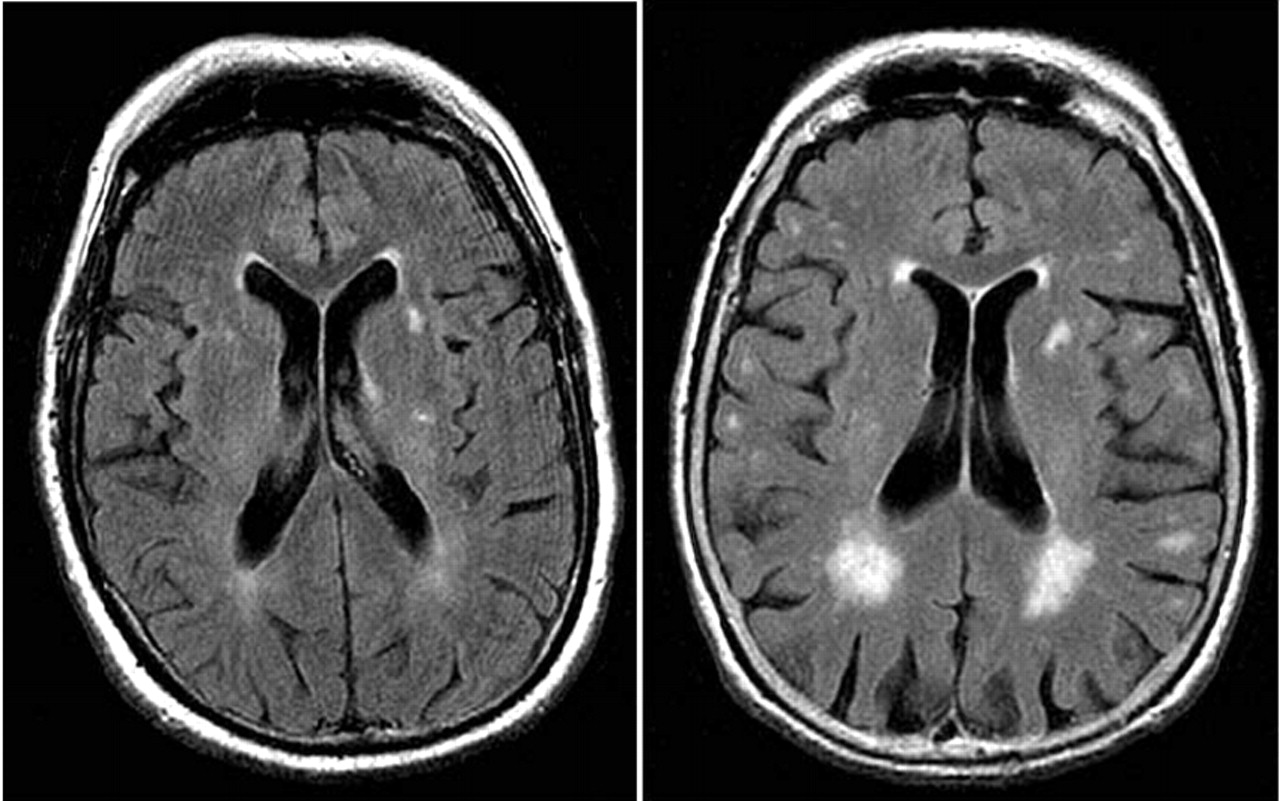

In [ ]:
display(IPImage(filename=image_filename, height=300))


In [ ]:
system_instruction = "Sei un esperto neurologo."

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image_url", "image_url": {"url": image_url}}
        ]
    }
]

In [ ]:
VLLM_ENDPOINT

'http://35.240.108.178:8000/v1/chat/completions'

In [ ]:
MEDGEMMA_MODEL_NAME

'unsloth/medgemma-4b-it-bnb-4bit'

---

**[ User ]**

Descrivi questa MRI

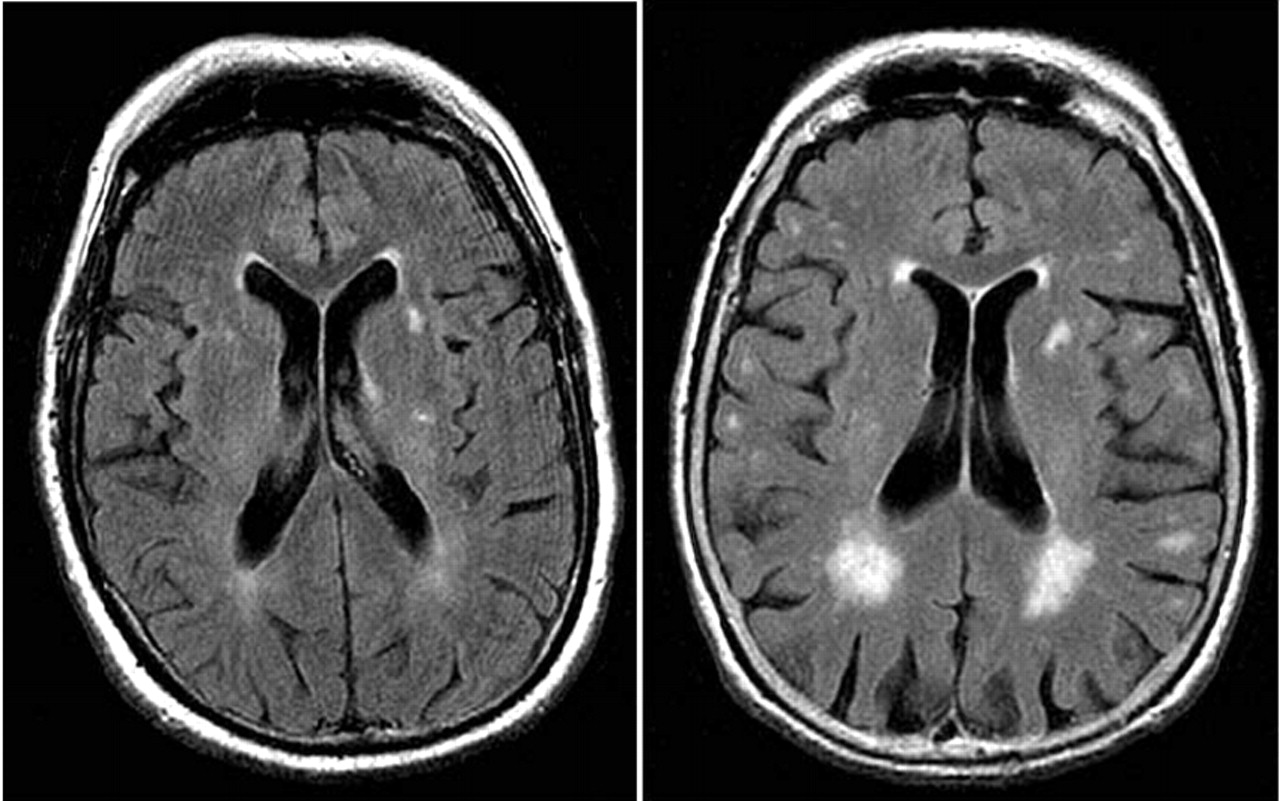

---

**[ MedGemma ]**

<Response [200 OK]>

---

In [ ]:
headers = {"Content-Type": "application/json"}
max_tokens = 500
temperature = 0.7
model_name = MEDGEMMA_MODEL_NAME
payload = {
    "messages": messages,
    "model": model_name,
    "max_tokens": max_tokens,
    "temperature": temperature
}

try:
  async with httpx.AsyncClient(timeout=50) as client:
    response = await client.post(VLLM_ENDPOINT, json=payload)
    response.raise_for_status()
    result = response.json()
    response_text = result["choices"][0]["message"]["content"]
    # vLLM restituisce un array di "text" nei "outputs"
except requests.exceptions.ConnectionError:
    print("Errore di connessione al server vLLM. Assicurati che l'endpoint sia corretto e il server sia attivo.")
except requests.exceptions.HTTPError as e:
    print(f"Errore HTTP dal server vLLM: {e}. Controlla il modello e i parametri.")
except Exception as e:
    print(f"Si è verificato un errore inatteso: {e}")


---

**[ User ]**

Descrivi questa MRI

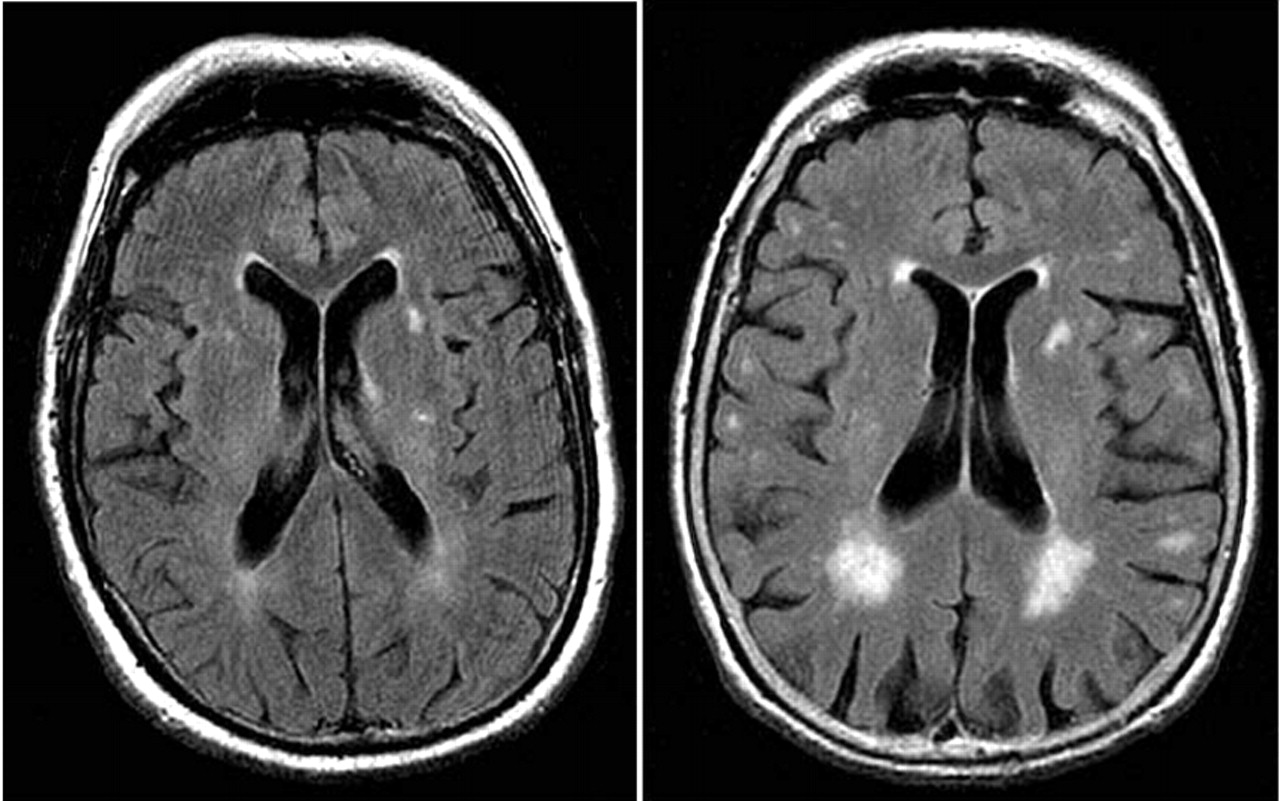

---

**[ MedGemma ]**

Basandomi sull'immagine fornita, posso fornire una descrizione del quadro risultante da una risonanza magnetica (MRI) del cervello.

**Osservazioni generali:**

*   **Localizzazione:** L'immagine mostra la sezione trasversale del cervello.
*   **Tecnica:** L'immagine sembra essere una sequenza T2-pesata, il che significa che i tessuti con un'elevata umidità appaiono più luminosi (bianchi).
*   **Apparecchiatura:** L'immagine mostra una distribuzione di piccole aree bianche (lesioni) in entrambi i emisferi cerebrali.

**Descrizione delle lesioni:**

*   **Distribuzione:** Le lesioni sono localizzate in modo diffuso in entrambi gli emisferi cerebrali.
*   **Aspetto:** Le lesioni appaiono come piccole aree bianche (iperintense) in relazione al tessuto cerebrale circostante.
*   **Potenziali cause:** L'aspetto delle lesioni potrebbe suggerire diverse possibili cause, tra cui:
    *   **Ictus ischemici:** Lesioni cerebrali causate da un blocco del flusso sanguigno.
    *   **Ictus emorragici:** Lesioni cerebrali causate da una rottura di un vaso sanguigno.
    *   **Infiammazione:** Processo infiammatorio nel cervello.
    *   **Danni ischemici/infartu):** Danni al tessuto cerebrale a causa di un'interruzione del flusso sanguigno.
    *   **Altre condizioni:** Alcune altre condizioni, come le malattie neurodegenerative, possono presentarsi con lesioni simili.

**Importante:**

*   Questa è solo una descrizione preliminare basata sull'immagine fornita.
*   Per una diagnosi definitiva, è necessario considerare il contesto clinico del paziente, i risultati degli esami del sangue, la storia clinica e altri dati rilevanti.
*   È fondamentale che un neurologo esperto interpreti l'intera sequenza di immagini MRI e le correli con la storia clinica del paziente.

**Prossimi passi:**

Per una valutazione più accurata, è essenziale:

1.  **Considerare il contesto clinico:** Quali sono i sintomi del paziente? Qual è la storia medica del paziente?

---

In [ ]:
if response_text:

  display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
  display(IPImage(filename=image_filename, height=300))
  display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response_text}\n\n---"))

### NER

In [ ]:
neurological_report = """
REPORT NEUROLOGICO
Paziente: Bianchi Maria, F.
Data di nascita: 12/05/1987
Data della visita: 20/06/2025
Diagnosi principale: Sclerosi Multipla Recidivante-Remittente (SM-RR)

1. Anamnesi remota e familiare:
Paziente di 38 anni, senza familiarità diretta per patologie demielinizzanti. Madre ipertesa, padre deceduto per infarto miocardico acuto a 62 anni. Nessuna storia familiare di patologie autoimmuni. Non allergie note a farmaci o alimenti.

2. Anamnesi patologica prossima:
La paziente riferisce esordio dei sintomi all’età di 28 anni con un episodio di neurite ottica retrobulbare a carico dell’occhio destro.
Presenza VAF di TP53, RUNX1, SF3B1. Non riscontrate aberrazioni significative
Attualmente in terapia di fondo con interferone beta-1a, associato a terapia sintomatica con baclofene per spasticità e pregabalin per disestesie dolorose. Segue regolari controlli ambulatoriali neurologici.

"""

rimosso = """

3. Esame obiettivo neurologico:
- Stato mentale: vigile, orientata nel tempo e nello spazio, linguaggio fluente, memoria a breve e lungo termine conservata.
- Nervi cranici: papilla ottica pallida a destra, lieve nistagmo orizzontale bilaterale. Motilità oculare conservata salvo leggera diplopia per sguardi laterali estremi. Udito nei limiti. Riflessi corneali presenti bilateralmente. Mimica facciale simmetrica. Faringeo e motilità linguale normali.
- Forza muscolare: lievissima ipoastenia dell’arto superiore destro (4+/5), tono muscolare aumentato agli arti inferiori con segno di spasticità lieve bilaterale.
- Sensibilità: ipoestesia tattile a calza e guanto, lieve disestesia alla palpazione profonda degli arti inferiori.
- Riflessi osteotendinei: iperreflessia diffusa agli arti inferiori, clono achilleo bilaterale, segno di Babinski positivo bilateralmente.
- Coordinazione: dismetria lieve all’indice-naso a destra, segno di Romberg positivo, andatura atassica con base allargata.
- Marcia e stazione eretta: deambulazione autonoma ma instabile su superfici irregolari; difficoltà nell’esecuzione della marcia tandem.

4. Esami strumentali:
- RM encefalo e midollo cervicale (ultima eseguita il 10/05/2025): multiple placche iperintense in T2 e FLAIR a livello periventricolare, del corpo calloso e tronco encefalico; una placca cervicale a C2-C3 con lieve enhancement di contrasto, indicativa di lesione attiva. Nessun segno di atrofia corticale significativa.
- Potenziali evocati visivi: prolungamento della latenza P100 a destra.
- Liquor (ultimo prelievo): presenza di bande oligoclonali IgG assenti nel siero, proteinorrachia 58 mg/dL.

5. Considerazioni cliniche:
Il quadro clinico e neuroradiologico è coerente con sclerosi multipla a decorso recidivante-remittente in fase di parziale attività di malattia. Si rileva una discreta compromissione funzionale soprattutto a livello della coordinazione e dell’equilibrio, con tendenza alla spasticità degli arti inferiori e disturbi sensitivi persistenti.

Nonostante la terapia di fondo con interferone beta-1a, si registrano ricadute cliniche e segni di progressione radiologica, suggerendo una possibile risposta subottimale al trattamento attuale.

6. Piano terapeutico e raccomandazioni:
- Valutare switch terapeutico verso farmaco di seconda linea (opzione natalizumab o fingolimod) previa rivalutazione del profilo rischio-beneficio e screening per JC virus.
- Intensificare fisioterapia neuromotoria con obiettivo di potenziamento dell’equilibrio e riduzione della spasticità.
- Valutare integrazione con logopedia in caso di peggioramento di disartria o disturbi di deglutizione.
- Continuare terapia sintomatica per spasticità e neuropatia dolorosa.
- Programmare nuovo controllo RM encefalo e midollo tra 6 mesi o in caso di nuova ricaduta.
- Monitoraggio ematochimico periodico per parametri di sicurezza legati alla terapia immunomodulante.

Firma del neurologo:
Dott. Giovanni Rossi, Neurologo
Unità Operativa di Neurologia
Ospedale Maggiore, Milano
"""
display(Markdown(f"---\n\n**[ User ]**\n\n{neurological_report}"))



---

**[ User ]**


REPORT NEUROLOGICO
Paziente: Bianchi Maria, F.
Data di nascita: 12/05/1987
Data della visita: 20/06/2025
Diagnosi principale: Sclerosi Multipla Recidivante-Remittente (SM-RR)

1. Anamnesi remota e familiare:
Paziente di 38 anni, senza familiarità diretta per patologie demielinizzanti. Madre ipertesa, padre deceduto per infarto miocardico acuto a 62 anni. Nessuna storia familiare di patologie autoimmuni. Non allergie note a farmaci o alimenti.

2. Anamnesi patologica prossima:
La paziente riferisce esordio dei sintomi all’età di 28 anni con un episodio di neurite ottica retrobulbare a carico dell’occhio destro.
Presenza VAF di TP53, RUNX1, SF3B1. Non riscontrate aberrazioni significative
Attualmente in terapia di fondo con interferone beta-1a, associato a terapia sintomatica con baclofene per spasticità e pregabalin per disestesie dolorose. Segue regolari controlli ambulatoriali neurologici.



In [ ]:
ground_truth = {
    "nome_paziente": "Bianchi Maria",
    "data_nascita": "12/05/1987",
    "data_visita": "20/06/2025",
    "diagnosi": "Sclerosi Multipla Recidivante-Remittente",
    "età": 38,
    "anamnesi_familiare": {
        "patologie_autoimmuni": False,
        "ipertensione": True,
        "patologie_cardiovascolari": True
    },
    "età_primo_sintomo": 28,
    "ricadute": [
        {
            "sintomi": "neurite ottica retrobulbare occhio destro",
            "terapia": "steroidi ad alto dosaggio"
        },
        {
            "sintomi": "parestesie arti inferiori, lieve atassia",
            "terapia": "recupero spontaneo"
        },
        {
            "sintomi": "diplopia intermittente",
            "terapia": "interferone beta-1a"
        },
        {
            "sintomi": "instabilità alla marcia, difficoltà di coordinazione mano destra",
            "terapia": "interferone beta-1a"
        }
    ],
    "terapia_attuale": {
        "di_fondo": "interferone beta-1a",
        "sintomatica": ["baclofene", "pregabalin"]
    },
    "obiettività_neurologica": {
        "deficit_visivi": "papilla ottica pallida, nistagmo, diplopia",
        "deficit_motori": "ipoastenia arto superiore destro, spasticità arti inferiori",
        "deficit_sensitivi": "ipoestesia, disestesia",
        "riflessi": "iperreflessia, clono, Babinski positivo",
        "coordinazione": "dismetria, Romberg positivo, atassia"
    },
    "reperti_strumentali": {
        "lesioni_encefaliche": "placche T2/FLAIR periventricolari, tronco encefalico, corpo calloso",
        "lesioni_midollo_cervicale": "placca C2-C3 attiva"
    },
    "liquor": {
        "bande_oligoclonali": "positive",
        "proteinorrachia_mg_dl": 58
    },
    "raccomandazioni": [
        "valutare switch a farmaco di seconda linea",
        "intensificare fisioterapia",
        "valutare logopedia",
        "monitoraggio RM e esami ematochimici"
    ]
}


In [ ]:
empty_schema = {
    "nome_paziente": "",
    "data_nascita": "",
    "data_visita": "",
    "diagnosi": "",
    "età": None,
    "anamnesi_familiare": {
        "patologie_autoimmuni": None,
        "ipertensione": None,
        "patologie_cardiovascolari": None
    },
    "età_primo_sintomo": None,
    "ricadute": [
        {
            "sintomi": "",
            "terapia": ""
        }
    ],
    "terapia_attuale": {
        "di_fondo": "",
        "sintomatica": []
    },
    "obiettività_neurologica": {
        "deficit_visivi": "",
        "deficit_motori": "",
        "deficit_sensitivi": "",
        "riflessi": "",
        "coordinazione": ""
    },
    "reperti_strumentali": {
        "lesioni_encefaliche": "",
        "lesioni_midollo_cervicale": ""
    },
    "liquor": {
        "bande_oligoclonali": "",
        "proteinorrachia_mg_dl": None
    },
    "raccomandazioni": []
}


In [ ]:
import json

schema = json.dumps(empty_schema)

In [ ]:
schema

'{"nome_paziente": "", "data_nascita": "", "data_visita": "", "diagnosi": "", "et\\u00e0": null, "anamnesi_familiare": {"patologie_autoimmuni": null, "ipertensione": null, "patologie_cardiovascolari": null}, "et\\u00e0_primo_sintomo": null, "ricadute": [{"sintomi": "", "terapia": ""}], "terapia_attuale": {"di_fondo": "", "sintomatica": []}, "obiettivit\\u00e0_neurologica": {"deficit_visivi": "", "deficit_motori": "", "deficit_sensitivi": "", "riflessi": "", "coordinazione": ""}, "reperti_strumentali": {"lesioni_encefaliche": "", "lesioni_midollo_cervicale": ""}, "liquor": {"bande_oligoclonali": "", "proteinorrachia_mg_dl": null}, "raccomandazioni": []}'

In [ ]:
chiavi = """
- nome_paziente
- data_nascita
- data_visita
- diagnosi
- età
- mutazioni
- citogenetica
- anamnesi_familiare.patologie_autoimmuni
- anamnesi_familiare.ipertensione
- anamnesi_familiare.patologie_cardiovascolari
- età_primo_sintomo
- ricadute[].sintomi
- ricadute[].terapia
- terapia_attuale.di_fondo
- terapia_attuale.sintomatica
- obiettività_neurologica.deficit_visivi
- obiettività_neurologica.deficit_motori
- obiettività_neurologica.deficit_sensitivi
- obiettività_neurologica.riflessi
- obiettività_neurologica.coordinazione
- reperti_strumentali.lesioni_encefaliche
- reperti_strumentali.lesioni_midollo_cervicale
- liquor.bande_oligoclonali
- liquor.proteinorrachia_mg_dl
- raccomandazioni
"""


In [ ]:
print("\n--- Estrazione di Informazioni (MedGemma Zero-Shot) ---")
prompt_estrazione = f"""Dal seguente testo clinico: {neurological_report}\n Estrai le seguenti informazioni in formato JSON: {chiavi}.\n Se non trovi alcuni campi lasciali vuoti.

JSON:"""
print(prompt_estrazione)



--- Estrazione di Informazioni (MedGemma Zero-Shot) ---
Dal seguente testo clinico: 
REPORT NEUROLOGICO
Paziente: Bianchi Maria, F.
Data di nascita: 12/05/1987
Data della visita: 20/06/2025
Diagnosi principale: Sclerosi Multipla Recidivante-Remittente (SM-RR)

1. Anamnesi remota e familiare:
Paziente di 38 anni, senza familiarità diretta per patologie demielinizzanti. Madre ipertesa, padre deceduto per infarto miocardico acuto a 62 anni. Nessuna storia familiare di patologie autoimmuni. Non allergie note a farmaci o alimenti.

2. Anamnesi patologica prossima:
La paziente riferisce esordio dei sintomi all’età di 28 anni con un episodio di neurite ottica retrobulbare a carico dell’occhio destro.
Presenza VAF di TP53, RUNX1, SF3B1. Non riscontrate aberrazioni significative
Attualmente in terapia di fondo con interferone beta-1a, associato a terapia sintomatica con baclofene per spasticità e pregabalin per disestesie dolorose. Segue regolari controlli ambulatoriali neurologici.


 Estrai 

In [ ]:

  print("\n--- Riassunto di Testo (MedGemma - Modello Specializzato) ---")

  print("\n--- Estrazione di Informazioni (MedGemma - Modello Specializzato) ---")
  estrazione_medgemma = await call_llm(prompt_estrazione, MEDGEMMA_MODEL_NAME, max_tokens=200, temperature=0.1)
  print(f"\nPrompt: {prompt_estrazione}")
  print(f"Risposta (MedGemma):\n{estrazione_medgemma}")
  try:
      json_output_medgemma = json.loads(estrazione_medgemma)
      print("\nInformazioni estratte (MedGemma Parsate JSON):")
      print(json.dumps(json_output_medgemma, indent=2))
  except json.JSONDecodeError:
      print("\nImpossibile parsare la risposta come JSON. Il modello potrebbe non aver formattato correttamente.")


--- Riassunto di Testo (MedGemma - Modello Specializzato) ---

--- Estrazione di Informazioni (MedGemma - Modello Specializzato) ---

Prompt: Dal seguente testo clinico: 
REPORT NEUROLOGICO
Paziente: Bianchi Maria, F.
Data di nascita: 12/05/1987
Data della visita: 20/06/2025
Diagnosi principale: Sclerosi Multipla Recidivante-Remittente (SM-RR)

1. Anamnesi remota e familiare:
Paziente di 38 anni, senza familiarità diretta per patologie demielinizzanti. Madre ipertesa, padre deceduto per infarto miocardico acuto a 62 anni. Nessuna storia familiare di patologie autoimmuni. Non allergie note a farmaci o alimenti.

2. Anamnesi patologica prossima:
La paziente riferisce esordio dei sintomi all’età di 28 anni con un episodio di neurite ottica retrobulbare a carico dell’occhio destro.
Presenza VAF di TP53, RUNX1, SF3B1. Non riscontrate aberrazioni significative
Attualmente in terapia di fondo con interferone beta-1a, associato a terapia sintomatica con baclofene per spasticità e pregabalin p

In [ ]:
import requests
import json
import httpx

# --- CONFIGURAZIONE DEL TUO VLLM (DA MODIFICARE!) ---
VLLM_ENDPOINT = f"http://{HOST}:{PORT}/v1/chat/completions" # Esempio: http://tuo_server_ip:8000/generate
GENERALIST_MODEL_NAME = "microsoft/Phi-3-mini-4k-instruct" # Esempio: "mistralai/Mistral-7B-Instruct-v0.2"
MEDGEMMA_MODEL_NAME = "unsloth/medgemma-4b-it-bnb-4bit" # Esempio: "google/medgemma-7b"

# Funzione per inviare una richiesta al tuo server vLLM
async def call_llm(prompt, model_name, max_tokens=150, temperature=0.7):
    headers = {"Content-Type": "application/json"}
    payload = {
        "messages": [{"role": "user", "content": prompt}],
        "model": model_name,
        "max_tokens": max_tokens,
        "temperature": temperature
    }

    try:
        async with httpx.AsyncClient(timeout=50) as client:
          response = await client.post(VLLM_ENDPOINT, json=payload)
          response.raise_for_status()
          result = response.json()
          response_text = result["choices"][0]["message"]["content"]
          # vLLM restituisce un array di "text" nei "outputs"
          return response_text # result['outputs'][0]['text'].strip()
    except requests.exceptions.ConnectionError:
        return "Errore di connessione al server vLLM. Assicurati che l'endpoint sia corretto e il server sia attivo."
    except requests.exceptions.HTTPError as e:
        return f"Errore HTTP dal server vLLM: {e}. Controlla il modello e i parametri."
    except Exception as e:
        return f"Si è verificato un errore inatteso: {e}"

print("Pronto a interagire con gli LLM tramite vLLM.")
print("Ricorda di configurare YOUR_VLLM_ENDPOINT, GENERALIST_MODEL_NAME e MEDGEMMA_MODEL_NAME!")



Pronto a interagire con gli LLM tramite vLLM.
Ricorda di configurare YOUR_VLLM_ENDPOINT, GENERALIST_MODEL_NAME e MEDGEMMA_MODEL_NAME!


In [ ]:

## Generalista
general_model = 'abhishekchohan/gemma-3-12b-it-quantized-W4A16'
print("\n--- Riassunto di Testo (MedGemma - Modello Specializzato) ---")

print("\n--- Estrazione di Informazioni (MedGemma - Modello Specializzato) ---")
estrazione_medgemma = await call_llm(prompt_estrazione, general_model, max_tokens=1000, temperature=0.7)
try:
    json_output_medgemma = json.loads(estrazione_medgemma)
    print("\nInformazioni estratte (MedGemma Parsate JSON):")
    print(json.dumps(json_output_medgemma, indent=2))
except json.JSONDecodeError:
    print("\nImpossibile parsare la risposta come JSON. Il modello potrebbe non aver formattato correttamente.")


--- Riassunto di Testo (MedGemma - Modello Specializzato) ---

--- Estrazione di Informazioni (MedGemma - Modello Specializzato) ---

Impossibile parsare la risposta come JSON. Il modello potrebbe non aver formattato correttamente.


In [ ]:
if response_text:

  display(Markdown(f"---\n\n**[ User ]**\n\n{neurological_report}"))
  display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{estrazione_medgemma}\n\n---"))

---

**[ User ]**


REPORT NEUROLOGICO
Paziente: Bianchi Maria, F.
Data di nascita: 12/05/1987
Data della visita: 20/06/2025
Diagnosi principale: Sclerosi Multipla Recidivante-Remittente (SM-RR)

1. Anamnesi remota e familiare:
Paziente di 38 anni, senza familiarità diretta per patologie demielinizzanti. Madre ipertesa, padre deceduto per infarto miocardico acuto a 62 anni. Nessuna storia familiare di patologie autoimmuni. Non allergie note a farmaci o alimenti.

2. Anamnesi patologica prossima:
La paziente riferisce esordio dei sintomi all’età di 28 anni con un episodio di neurite ottica retrobulbare a carico dell’occhio destro.
Presenza VAF di TP53, RUNX1, SF3B1. Non riscontrate aberrazioni significative
Attualmente in terapia di fondo con interferone beta-1a, associato a terapia sintomatica con baclofene per spasticità e pregabalin per disestesie dolorose. Segue regolari controlli ambulatoriali neurologici.



---

**[ MedGemma ]**

```json
{
  "nome_paziente": "Bianchi Maria",
  "data_nascita": "12/05/1987",
  "data_visita": "20/06/2025",
  "diagnosi": "Sclerosi Multipla Recidivante-Remittente (SM-RR)",
  "età": 38,
  "mutazioni": [
    "TP53",
    "RUNX1",
    "SF3B1"
  ],
  "citogenetica": "Non riscontrate aberrazioni significative",
  "anamnesi_familiare": {
    "patologie_autoimmuni": "Nessuna",
    "ipertensione": "Sì (madre)",
    "patologie_cardiovascolari": "Sì (padre deceduto per infarto miocardico acuto)"
  },
  "età_primo_sintomo": 28,
  "ricadute": [
    {
      "sintomi": "Neurite ottica retrobulbare a carico dell’occhio destro",
      "terapia": ""
    }
  ],
  "terapia_attuale": {
    "di_fondo": "Interferone beta-1a",
    "sintomatica": "Baclofene per spasticità e pregabalin per disestesie dolorose"
  },
  "obiettività_neurologica": {
    "deficit_visivi": "Neurite ottica retrobulbare (occhio destro)",
    "deficit_motori": "",
    "deficit_sensitivi": "",
    "riflessi": "",
    "coordinazione": ""
  },
  "reperti_strumentali": {
    "lesioni_encefaliche": "",
    "lesioni_midollo_cervicale": ""
  },
  "liquor": {
    "bande_oligoclonali": "",
    "proteinorrachia_mg_dl": ""
  },
  "raccomandazioni": ""
}
```

---

In [ ]:
prefix_instruction = "Leggi il seguente report neurologico e compila questo JSON di output in italiano secondo lo schema fornito. Riporta solo le informazioni effettivamente presenti nel testo e mantieni la struttura invariata. Se un campo non è menzionato, lascialo vuoto o nullo. Ritorna solo il JSON"


In [ ]:
system_instruction = "Sei un esperto neurologo."

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}, {"type": "text", "text": prefix_instruction},]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": neurological_report},
            {"type": "text", "text": schema }
        ]
    }
]

In [ ]:
headers = {"Content-Type": "application/json"}
max_tokens = 500
temperature = 0.7
model_name = MEDGEMMA_MODEL_NAME
payload = {
    "messages": messages,
    "model": model_name,
    "max_tokens": max_tokens,
    "temperature": temperature
}

try:
  async with httpx.AsyncClient(timeout=50) as client:
    response = await client.post(VLLM_ENDPOINT, json=payload)
    response.raise_for_status()
    result = response.json()
    response_text = result["choices"][0]["message"]["content"]
    # vLLM restituisce un array di "text" nei "outputs"
except requests.exceptions.ConnectionError:
    print("Errore di connessione al server vLLM. Assicurati che l'endpoint sia corretto e il server sia attivo.")
except requests.exceptions.HTTPError as e:
    print(f"Errore HTTP dal server vLLM: {e}. Controlla il modello e i parametri.")
except Exception as e:
    print(f"Si è verificato un errore inatteso: {e}")

In [ ]:
response_text

'Okay, con vista, con 120254\n\n```\n\n```20120114220342205203420620450205032050306.\n\n```4030420506 504, 5050504,0334011040304040404040304040504040404030406040405040405040404040404040404040404040404040404040404040404040404040404040404040404040404044040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040'

In [ ]:
if response_text:

  display(Markdown(f"---\n\n**[ User ]**\n\n{neurological_report}"))
  display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response_text}\n\n---"))

---

**[ User ]**


REPORT NEUROLOGICO
Paziente: Bianchi Maria, F.
Data di nascita: 12/05/1987
Data della visita: 20/06/2025
Diagnosi principale: Sclerosi Multipla Recidivante-Remittente (SM-RR)

1. Anamnesi remota e familiare:
Paziente di 38 anni, senza familiarità diretta per patologie demielinizzanti. Madre ipertesa, padre deceduto per infarto miocardico acuto a 62 anni. Nessuna storia familiare di patologie autoimmuni. Non allergie note a farmaci o alimenti.

2. Anamnesi patologica prossima:
La paziente riferisce esordio dei sintomi all’età di 28 anni con un episodio di neurite ottica retrobulbare a carico dell’occhio destro, risoltosi parzialmente in seguito a terapia steroidea ad alto dosaggio. A distanza di circa due anni, comparsa di parestesie agli arti inferiori e lieve atassia, con recupero pressoché completo. Negli ultimi 18 mesi ha presentato due ricadute: la prima caratterizzata da diplopia intermittente, la seconda da sensazione di instabilità alla marcia e difficoltà di coordinazione motoria fine alla mano destra.

Attualmente in terapia di fondo con interferone beta-1a, associato a terapia sintomatica con baclofene per spasticità e pregabalin per disestesie dolorose. Segue regolari controlli ambulatoriali neurologici.

3. Esame obiettivo neurologico:
- Stato mentale: vigile, orientata nel tempo e nello spazio, linguaggio fluente, memoria a breve e lungo termine conservata.
- Nervi cranici: papilla ottica pallida a destra, lieve nistagmo orizzontale bilaterale. Motilità oculare conservata salvo leggera diplopia per sguardi laterali estremi. Udito nei limiti. Riflessi corneali presenti bilateralmente. Mimica facciale simmetrica. Faringeo e motilità linguale normali.
- Forza muscolare: lievissima ipoastenia dell’arto superiore destro (4+/5), tono muscolare aumentato agli arti inferiori con segno di spasticità lieve bilaterale.
- Sensibilità: ipoestesia tattile a calza e guanto, lieve disestesia alla palpazione profonda degli arti inferiori.
- Riflessi osteotendinei: iperreflessia diffusa agli arti inferiori, clono achilleo bilaterale, segno di Babinski positivo bilateralmente.
- Coordinazione: dismetria lieve all’indice-naso a destra, segno di Romberg positivo, andatura atassica con base allargata.
- Marcia e stazione eretta: deambulazione autonoma ma instabile su superfici irregolari; difficoltà nell’esecuzione della marcia tandem.

4. Esami strumentali:
- RM encefalo e midollo cervicale (ultima eseguita il 10/05/2025): multiple placche iperintense in T2 e FLAIR a livello periventricolare, del corpo calloso e tronco encefalico; una placca cervicale a C2-C3 con lieve enhancement di contrasto, indicativa di lesione attiva. Nessun segno di atrofia corticale significativa.
- Potenziali evocati visivi: prolungamento della latenza P100 a destra.
- Liquor (ultimo prelievo): presenza di bande oligoclonali IgG assenti nel siero, proteinorrachia 58 mg/dL.

5. Considerazioni cliniche:
Il quadro clinico e neuroradiologico è coerente con sclerosi multipla a decorso recidivante-remittente in fase di parziale attività di malattia. Si rileva una discreta compromissione funzionale soprattutto a livello della coordinazione e dell’equilibrio, con tendenza alla spasticità degli arti inferiori e disturbi sensitivi persistenti.

Nonostante la terapia di fondo con interferone beta-1a, si registrano ricadute cliniche e segni di progressione radiologica, suggerendo una possibile risposta subottimale al trattamento attuale.

6. Piano terapeutico e raccomandazioni:
- Valutare switch terapeutico verso farmaco di seconda linea (opzione natalizumab o fingolimod) previa rivalutazione del profilo rischio-beneficio e screening per JC virus.
- Intensificare fisioterapia neuromotoria con obiettivo di potenziamento dell’equilibrio e riduzione della spasticità.
- Valutare integrazione con logopedia in caso di peggioramento di disartria o disturbi di deglutizione.
- Continuare terapia sintomatica per spasticità e neuropatia dolorosa.
- Programmare nuovo controllo RM encefalo e midollo tra 6 mesi o in caso di nuova ricaduta.
- Monitoraggio ematochimico periodico per parametri di sicurezza legati alla terapia immunomodulante.

Firma del neurologo:
Dott. Giovanni Rossi, Neurologo
Unità Operativa di Neurologia
Ospedale Maggiore, Milano


---

**[ MedGemma ]**

Okay, con vista, con 120254

```

```20120114220342205203420620450205032050306.

```4030420506 504, 5050504,0334011040304040404040304040504040404030406040405040405040404040404040404040404040404040404040404040404040404040404040404040404040404044040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040404040

---


## 2. Segmentazione di Immagini in Neurologia: Identificare e Delineare

La **segmentazione di immagini** è una tecnica di visione artificiale che consiste nel suddividere un'immagine in regioni o oggetti con proprietà simili. In medicina, è fondamentale per:

* **Quantificazione:** Misurare il volume di lesioni, tumori o atrofia cerebrale.
* **Navigazione Chirurgica:** Delineare le aree di interesse per interventi precisi.
* **Diagnosi:** Aiutare a identificare e localizzare patologie.


### 2.1. MedSAM: Un Modello Fondamentale per la Segmentazione Medica

**MedSAM (Medical Segment Anything Model)** è un esempio di "foundation model" adattato al dominio medico. Nasce dal successo del modello Segment Anything Model (SAM) di Meta AI, addestrato su una quantità enorme di immagini generiche. MedSAM è stato poi specializzato per riconoscere e segmentare una vasta gamma di strutture anatomiche e patologie nelle immagini mediche con notevole accuratezza, anche con pochi esempi o con input minimi (es. un singolo punto).

**Nota importante per la demo:** L'esecuzione di MedSAM su immagini complesse può richiedere risorse computazionali significative (GPU dedicate e RAM). Per questa sessione, dimostreremo il concetto: potremmo mostrare l'output pre-calcolato su un'immagine di esempio, oppure, se le risorse di Colab lo permettono in tempo reale per un esempio semplificato, eseguiremo una versione più leggera o un modello simile.

#### **Esempio Concettuale di Segmentazione**

Simuleremo il caricamento di un'immagine di risonanza magnetica cerebrale e visualizzeremo un esempio di segmentazione di una lesione.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# --- Parte 1: Download e Visualizzazione di un'Immagine Medica di Esempio ---
# Useremo un'immagine di esempio disponibile pubblicamente o genereremo una dummy.
# Per una demo reale, potresti avere un'immagine di RM cerebrale con una lesione.

# Funzione per scaricare un'immagine
def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status() # Lancia un errore per risposte http errate
        img = Image.open(BytesIO(response.content)).convert("L") # Converti in scala di grigi
        return np.array(img)
    except Exception as e:
        print(f"Errore durante il download o l'apertura dell'immagine: {e}")
        # Genera un'immagine dummy se il download fallisce
        print("Generazione di un'immagine di esempio sintetica...")
        dummy_img = np.zeros((128, 128), dtype=np.uint8)
        # Aggiungi una forma semplice per simulare una struttura
        dummy_img[30:60, 30:60] = 150 # Regione grigia
        dummy_img[70:90, 70:90] = 200 # Regione più chiara
        return dummy_img

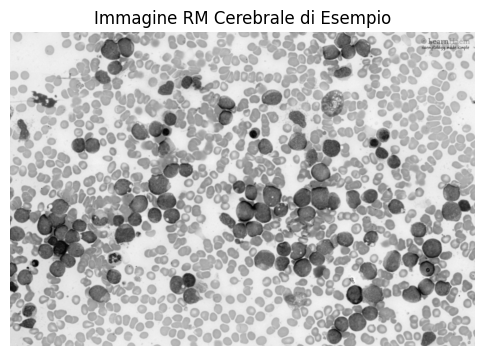

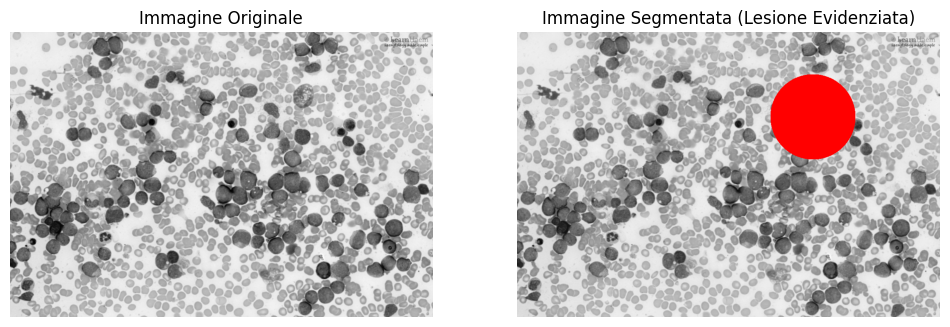


Spiegazione della Segmentazione:
In questo esempio concettuale, abbiamo simulato come un modello di IA (come MedSAM)
potrebbe identificare e delineare una specifica area di interesse, come una lesione o
una struttura anatomica. L'area rossa indica la regione 'segmentata' dal modello.
Questo è fondamentale per la quantificazione e la pianificazione diagnostica/terapeutica.


In [ ]:
# URL di un'immagine di esempio (puoi sostituirla con una tua immagine medicale)
# Questa è un'immagine generica di un cervello.
image_url = 'https://www.learnhaem.com/wp-content/uploads/2020/02/aml-m1-1024x691.png' # @param
# Puoi anche caricare un'immagine direttamente su Colab e usarla:
# from google.colab import files
# uploaded = files.upload()
# img_path = list(uploaded.keys())[0]
# original_image = np.array(Image.open(img_path).convert("L"))

original_image = download_image(image_url)

if original_image is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image, cmap='gray')
    plt.title('Immagine RM Cerebrale di Esempio')
    plt.axis('off')
    plt.show()

# --- Parte 2: Simulazione Concettuale della Segmentazione ---
# Per una demo live con MedSAM, dovresti installare le librerie MedSAM e caricarne un checkpoint.
# Dato il tempo limitato e le risorse, mostreremo il CONCETTO di mascheramento.

# Creiamo una maschera di segmentazione FITTIZIA per l'esempio
# Questa maschera simula la segmentazione di una lesione o di una struttura specifica.
segmentation_mask = np.zeros_like(original_image, dtype=np.uint8)
# Simula una lesione nella parte superiore destra dell'immagine
mask_center_x, mask_center_y = int(original_image.shape[1] * 0.7), int(original_image.shape[0] * 0.3)
mask_radius = int(min(original_image.shape) * 0.15)
Y, X = np.ogrid[:original_image.shape[0], :original_image.shape[1]]
dist_from_center = np.sqrt((X - mask_center_x)**2 + (Y - mask_center_y)**2)
segmentation_mask[dist_from_center < mask_radius] = 1 # Imposta a 1 dove c'è la "lesione"

# Combina l'immagine originale con la maschera di segmentazione
# Sovrapponiamo la maschera sulla scala di blu per visualizzare l'area segmentata
segmented_overlay = np.stack([original_image, original_image, original_image], axis=-1)
segmented_overlay[segmentation_mask == 1, 0] = 255 # Rende rossa la zona segmentata
segmented_overlay[segmentation_mask == 1, 1] = 0
segmented_overlay[segmentation_mask == 1, 2] = 0

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Immagine Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_overlay)
plt.title('Immagine Segmentata (Lesione Evidenziata)')
plt.axis('off')

plt.show()

print("\nSpiegazione della Segmentazione:")
print("In questo esempio concettuale, abbiamo simulato come un modello di IA (come MedSAM)")
print("potrebbe identificare e delineare una specifica area di interesse, come una lesione o")
print("una struttura anatomica. L'area rossa indica la regione 'segmentata' dal modello.")
print("Questo è fondamentale per la quantificazione e la pianificazione diagnostica/terapeutica.")



### MedSAM: Segmentazione per immagini mediche

In [ ]:
#@title Data download
url = "https://drive.google.com/drive/folders/15hE_hEevLcIEq5Sf8hLotlMlA1KH_q06?usp=sharing"
import gdown
gdown.download_folder(url, quiet=True)

FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1jMj-S5DF8S6Osso-sGOqKBZMWTK0ZcBV

but Gdown can't. Please check connections and permissions.

In [ ]:
#@title Environment setup
!pip install torch==2.4.1 torchvision==0.19.1 --index-url https://download.pytorch.org/whl/cu121
!pip install jax==0.4.33
!pip install numpy==1.24

!pip install open_clip_torch==2.23.0
!pip install git+https://github.com/openai/CLIP.git
!pip install grad_cam==1.4.6
!pip install transformers==4.35.2

Looking in indexes: https://download.pytorch.org/whl/cu121
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-dbd0kh0k
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-dbd0kh0k
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=b529108531c4d618851b0ea88bffb08178aff9d43dbdb8d4274c282fcda2546e
  Stored in directory: /tmp/pip-ephem-wheel-cache-q9t78bp4/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad_cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38340 sha256=5e6f83d8d5

In [ ]:
# get repo and install env
!git clone https://github.com/HealthX-Lab/MedCLIP-SAMv2

import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


Cloning into 'MedCLIP-SAMv2'...
remote: Enumerating objects: 680, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 680 (delta 31), reused 25 (delta 25), pack-reused 641 (from 1)
Receiving objects: 100% (680/680), 13.94 MiB | 15.29 MiB/s, done.
Resolving deltas: 100% (207/207), done.
PyTorch version: 2.4.1+cu121
Torchvision version: 0.19.1+cu121
CUDA is available: False
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-bnbsldkl
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-bnbsldkl
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=733e5fda568d4657567a46c2937ffb30c500cf45ebf182474934c781fa636

In [ ]:
%cd MedCLIP-SAMv2/saliency_maps

[Errno 2] No such file or directory: 'MedCLIP-SAMv2/saliency_maps'
/content/MedCLIP-SAMv2/saliency_maps


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import torch
import clip
import cv2
import sys
import numpy as np
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt

from transformers import CLIPProcessor
from scripts.plot import generate_shades_with_alpha, plot_text_with_colors, visualize_vandt_heatmap
from scripts.methods import vision_heatmap_iba, text_heatmap_iba
from transformers import AutoModel, AutoProcessor, AutoTokenizer
from PIL import Image, ImageOps
os.environ["TOKENIZERS_PARALLELISM"] = "false"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def plot(model, image, text, vbeta=0.1, vvar=1, vlayer=9, tbeta=0.1, tvar=1, tlayer=9):
    # Preprocess image
    image = Image.open(image).convert('RGB')
    image_feat = processor(images=image, return_tensors="pt")['pixel_values'].to(device) # 3*224*224
    # Tokenize text
    text_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)]).to(device)
    text_words = tokenizer.convert_ids_to_tokens(text_ids[0].tolist())
    # Train information bottleneck on image
    print("Training M2IB on the image...")
    vmap = vision_heatmap_iba(text_ids, image_feat, model, vlayer, vbeta, vvar)
    # Train information bottleneck on text
    print("Training M2IB on the text...")
    tmap = text_heatmap_iba(text_ids, image_feat, model, tlayer, tbeta, tvar)
    # Just for demonstration purposes
    image_under = processor2(images=image, return_tensors="pt", do_normalize=False)['pixel_values'][0].permute(1,2,0)
    visualize_vandt_heatmap(tmap, vmap, text_words, image_under)
    img = np.array(image)
    vmap = cv2.resize(np.array(vmap),(img.shape[1],img.shape[0]),interpolation=cv2.INTER_NEAREST)*255
    return vmap

def overlay_segmentation(rgb_image, segmentation, alpha=0.4):
    """
    Overlays a red segmentation mask on top of a grayscale-looking RGB image.

    Parameters:
        rgb_image (PIL.Image.Image): RGB image loaded with PIL (even if it looks grayscale).
        segmentation (np.ndarray): 2D binary array (same width/height as image) where mask == 1 indicates the segmented area.
        alpha (float): Transparency of the segmentation overlay.
    """
    if not isinstance(rgb_image, Image.Image):
        raise TypeError("rgb_image must be a PIL.Image.Image object")

    image_np = np.array(rgb_image).astype(np.float32) / 255.0  # Normalize to [0,1]
    # print(image_np.shape)
    # print(segmentation.shape)

    if segmentation.shape != image_np.shape[:2]:
        raise ValueError("Segmentation mask must have the same width and height as the image")

    # Create red overlay where segmentation is 1
    red_mask = np.zeros_like(image_np)
    red_mask[..., 0] = 1  # Set red channel

    # Blend the red mask with the image where segmentation is 1
    overlay = np.where(segmentation[..., None].astype(bool),
                       (1 - alpha) * image_np + alpha * red_mask,
                       image_np)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(overlay)
    plt.axis('off')
    plt.show()

In [ ]:
model = AutoModel.from_pretrained("chuhac/BiomedCLIP-vit-bert-hf", trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("chuhac/BiomedCLIP-vit-bert-hf", trust_remote_code=True)
processor2 = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
tokenizer = AutoTokenizer.from_pretrained("chuhac/BiomedCLIP-vit-bert-hf", trust_remote_code=True)

config.json: 0.00B [00:00, ?B/s]

configuration_biomed_clip.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/chuhac/BiomedCLIP-vit-bert-hf:
- configuration_biomed_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`model_type` is found in both `text_config_dict` and `text_config` but with different values. The value `text_config_dict["model_type"]` will be used instead.
`model_type` is found in both `vision_config_dict` and `vision_config` but with different values. The value `vision_config_dict["model_type"]` will be used instead.


modeling_biomed_clip.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/chuhac/BiomedCLIP-vit-bert-hf:
- modeling_biomed_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/784M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

`model_type` is found in both `text_config_dict` and `text_config` but with different values. The value `text_config_dict["model_type"]` will be used instead.
`model_type` is found in both `vision_config_dict` and `vision_config` but with different values. The value `vision_config_dict["model_type"]` will be used instead.


processing_biomed_clip.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/chuhac/BiomedCLIP-vit-bert-hf:
- processing_biomed_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
!pwd

/content/MedCLIP-SAMv2/saliency_maps


In [ ]:
!file /content/MedCLIP-SAMv2/saliency_maps/data/WhiteMatterHyperintensities.jpg


/content/MedCLIP-SAMv2/saliency_maps/data/WhiteMatterHyperintensities.jpg: empty


Training M2IB on the image...


Training Bottleneck: 100%|██████████| 10/10 [03:00<00:00, 18.08s/it]


Training M2IB on the text...


Training Bottleneck: 100%|██████████| 10/10 [02:56<00:00, 17.61s/it]


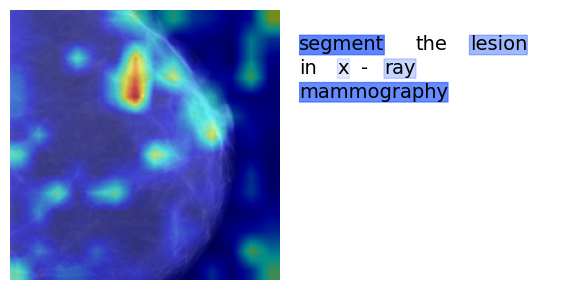

In [ ]:
# @title ## Saliency Maps
image_path = "/content/MedCLIP-SAMv2/saliency_maps/data/Breast-Mammo/1-142.jpg" # @param {type:"string"}
text = "segment the lesion in X-ray mammography" # @param {type:"string"}
vmap = plot(model, image_path, text)

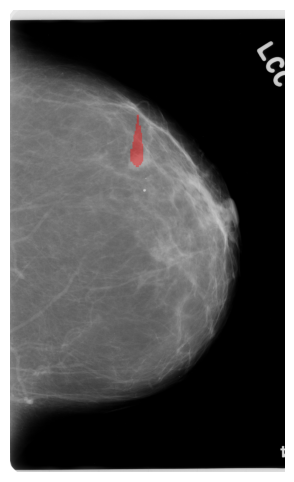

In [ ]:
# @title ## Postprocessing

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=10)
attn_weights = vmap / 255
# Keep only high attention weight scores
h, w = attn_weights.shape
attn_wg_threshold = 0.75 #@param {type:"slider", min:0.1, max:1.0, step:0.05}
filtered_attn_weights = attn_weights > attn_wg_threshold
attn_weights = attn_weights*filtered_attn_weights
image = cv2.resize(attn_weights, (256, 256),interpolation=cv2.INTER_NEAREST)
flat_image = image.reshape(-1, 1)

labels = kmeans.fit_predict(flat_image)

segmented_image = labels.reshape(256, 256)

centroids = kmeans.cluster_centers_.flatten()

# Identify the background cluster (assuming it has the lowest centroid value)
background_cluster = np.argmin(centroids)

# Mark background pixels as 0 and foreground pixels as 1
segmented_image = np.where(segmented_image == background_cluster, 0, 1)

segmented_image = cv2.resize(segmented_image, (w,h),interpolation=cv2.INTER_NEAREST)
segmented_image = segmented_image.astype(np.uint8)*255

nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(segmented_image)
sizes = stats[:, cv2.CC_STAT_AREA]

# Sort sizes (ignoring the background at index 0)
sorted_sizes = sorted(sizes[1:], reverse=True)

# Change this here if you want to segment more than one contour
num_contours = 1

# Determine the top K sizes
top_k_sizes = sorted_sizes[:num_contours]

im_result = np.zeros_like(im_with_separated_blobs)

for index_blob in range(1, nb_blobs):
    if sizes[index_blob] in top_k_sizes:
        im_result[im_with_separated_blobs == index_blob] = 255

segmented_image = im_result

cv2.imwrite("/content/MedCLIP-SAMv2/postprocessed_map.png", segmented_image)

# plt.imshow(segmented_image,cmap="gray")
overlay_segmentation(rgb_image=Image.open(image_path).convert('RGB'), segmentation=segmented_image)